Lab 6

Name: Wayne Lai, Partner: Gautam

This lab took approximately 4 hours outside of the classroom, about 7 hours total.

In [1]:
%matplotlib inline
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

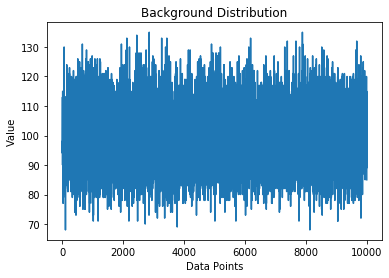

The upper limit is 149.34269979203077


In [7]:
# Problem 1
#
# First, a distribution was made. It is a poisson distribution with average of 100 at 100000 points.
# The standard deviation is calculated. For a sigma 5 value, I multiplied the standard deviation by
# 5 then add it to the mean of the distribution. To simulate real life, if the background forms the
# base of the detection, there should be only extraordinary signals above the background. In conclusion
# the 5 sigma sensitivity threshold is the upper limit.

mean = 100;
background = stats.poisson.rvs(mean, size = 10000)
background2 = background #backup

plt.title('Background Distribution')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.plot(background)

plt.show()

sig = np.std(background)
sig5 = sig * 5
ave = np.mean(background)
upper = ave + sig5
print('The upper limit is ' + str(upper))

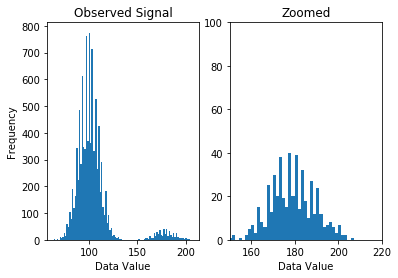

In [3]:
# Problem 2
#
# (a) The histogram below indicates signals of 8 sigma strength injected into the background data. The
# visual graph clearly distinguishes the background and the injected signals, as there are two mounds
# of data. The pile on the right, with higher mean, is the injected signal, as the size of it depends
# on the number of signals. In the case below, there are 10000 points of background against 500
# points of 8 sigma signal, so there is considerable size difference.
#
# (b) The observed value is stronger than the true injected signal, as the plot was set to have the
# injected signal added onto the background noise. This is further shown in the histogram, as the mean
# value for the observed value is at around 179, much higher than the 100 of the background. The second
# histogram on the bottom is the injected signal at greater zoom. The distribution should follow that
# of the poisson as it is a constant value added to a poisson distributed noise. The poisson is not
# symmetric, but the increase in the mean value will have it look more like a gaussian.

# The signal is made at 8 sigma, value is calculated.
sig8signal = np.std(background2) * 8;

# Made an array of random numbers that will be the index to the background data.
randIdx = np.random.choice(len(background2), 500, replace = False)

# The sigma 8 value is added to the data at the index found above.
newBackground = background2
for x in randIdx:
    newBackground[x] = newBackground[x] + sig8signal
    
# Histogram of the result.
plt.subplot(1,2,1)
plt.title('Observed Signal')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.hist(newBackground, bins = 100)

plt.subplot(1,2,2)
plt.title('Zoomed')
plt.xlabel('Data Value')
plt.xlim(150, 220)
plt.ylim(0, 100)
plt.hist(newBackground, bins = 100)

plt.show()

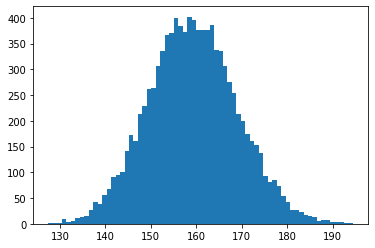

The 1 sigma value for part d is 9.910119958406154


In [13]:
# Problem 3
#
# (a) The following simulation takes the background data and injects them with signal of different sigma
# sensitivity. In a 2 dimensional histogram, the background data is represented horizontally. There will
# be a gradient that peaks at the mean of the distribution. In the class example, all the background data
# has the signal data applied, so we see only one collected bright spot at the mean. If the injected
# signal only applies to some data points, then there will be two peaks, one for the mean of the background
# and another for the mean of the injected signal. Depending on how strong the injected signal, stronger
# has larger sigma, the secondary peak will move further away from the background peak. Due to limited
# python knowledge, I was not able to create a 2d histogram.
#
# (b) If we look across horizontally for the y axis value of 8 sigma, we see brightness at the background
# mean at x = 100, then a weaker brightness at x = 179. This corresponds to the graph we have previously.
# The previous graph is just a slice of the 2d histogram at y = 8.
#
# (c) The meaning of this histogram is the frequency of occurance for some value of a data point. At sigma
# of greater than 5, we can see how often the injected signal occur and the amplitude of it above the
# background distribution. The injected signal will be a poisson distribution, as we are adding a value onto
# a poisson distributed background. The histogram mean is the amount of sigma determined for this problem.

# Using 6 sigma signal to inject into background data.
signalStrength2 = np.ones(10000) * 6 * sig
injectedSignal2 = signalStrength2 + background2

plt.hist(injectedSignal2, bins = 68)
plt.show()

# (d)
oneSigma = np.std(injectedSignal2)
print('The 1 sigma value for part d is ' + str(oneSigma))

# (e) After injecting a sigma 6 signal to all the background noise the sigma value at one remains the same
# as the background noise, because the behavior of the distribution has only shifted up in amplitude, nothing
# else changed. If we were to pick a few random points to have the signal added to it, the sigma value
# increases as there is now a bias of higher amplitude signal, and it pulls the mean and standard deviation
# towards higher values.

# Suit of signals to be injected from no sigma up to 30 sigma.
signalStrength = np.linspace(0,30,10000) * sig

# Two matices. One is the background data along the x axis, then repeated or stacked for however many
# values there are in the y axis. The other is the signal strength from 0 to 30 sigma.
xx, signal = np.meshgrid(background, signalStrength)

# Add the noise to the signal
obsSignal = xx + signal

#plt.hist2d(obsSignal, signal)
#plt.show()

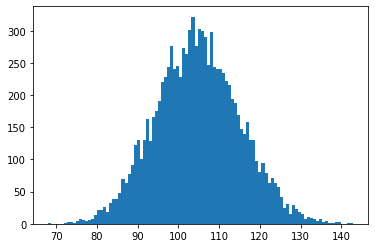

In [9]:
# Problem 4
#
# (a) Signal at between 0 and 1 sigma
signalStrength3 = np.linspace(0,1,10000) * sig

injectedSignal3 = signalStrength3 + background2

plt.hist(injectedSignal3, bins = 100)
plt.show()

# (b) The probability density function represents the percentage of each data value based on frequency.
# The more varied the data is, the wider the shape of the curve, and lower the peak. The signal is
# extending to zero makes sense, because of the area underneath the curve must add up to one. Since,
# the area is a finite value, the curve is not going to be reaching closer to zero without ever getting
# to it, instead, it will eventually end given a finite amount of data.

In [10]:
# (c) The mean and standard deviation can be calculated, while the number of samples are predetermined,
# and the z-score at 95% is 1.96.

xBar = np.mean(injectedSignal3)
xSigma = np.std(injectedSignal3)
xNum = len(injectedSignal3)
zScore = 1.96

confInt = xBar + zScore * xSigma / np.sqrt(xNum)
print('The 95% confidence upper bound is ' + str(confInt))

The 95% confidence upper bound is 104.94934122218265
